#Image - Collection of pixels, Matrix of numbers with 3 channels, each channel is a color
#8 Bit representation
#2^8 = 256
#0 -  Black
#1 - White
Pixel has 3 colors , depending on the numbers. R G B

In [2]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
root = os.getcwd()
imgPath = os.path.join(root,'thhy.jpg')

In [3]:
def histBackprojection():
     root = os.getcwd()
     imgPath = os.path.join(root,'thhy.jpg')
     img = cv.imread(imgPath, cv.IMREAD_GRAYSCALE)
     imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
     hist = cv.calcHist([imgRGB],[0],None,[256],[0,256])
     plt.figure()
     plt.subplot(231)
     plt.imshow(imgRGB)

     
     plt.show()

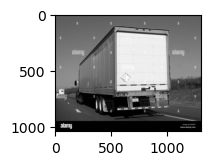

In [4]:
histBackprojection()

In [104]:
def morphTans():
     root = os.getcwd()
     imgPath = os.path.join(root,'thhy.jpg')
     img = cv.imread(imgPath, cv.IMREAD_GRAYSCALE)
     maxValue = 255
     blockSize = 7
     offset = 3
     plt.subplot(241)
     
     """
cv.ADAPTIVE_THRESH_GAUSSIAN_C:
    Specifies the adaptive method for threshold calculation.
    Uses a Gaussian-weighted sum of the neighborhood to determine the local threshold for each pixel.

cv.THRESH_BINARY:
    Specifies the type of thresholding to apply.
    Sets pixels above the threshold to maxValue (white), others to 0 (black).

Both parameters are used together in cv.adaptiveThreshold() to define how the local threshold is computed and how the image is binarized.
"""

     imgGauss = cv.adaptiveThreshold(img, maxValue, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize, offset)
     imgGauss = cv.GaussianBlur(imgGauss,(7,7),2)
     plt.imshow(imgGauss)
     plt.title('Gaussian adaptive')


     kernel = np.ones((7,7),np.uint8)
     erosion = cv.erode(imgGauss,kernel,iterations = 1)
     plt.subplot(242)
     plt.imshow(erosion,cmap = 'gray')
     plt.title('Erosion')

     dilation = cv.dilate(imgGauss,kernel,iterations = 1)
     plt.subplot(243)
     plt.imshow(dilation,cmap = 'gray')
     plt.title('Dilation')


     morphtypes = [cv.MORPH_OPEN, cv.MORPH_CLOSE, cv.MORPH_GRADIENT, cv.MORPH_TOPHAT, cv.MORPH_BLACKHAT]
     morphnames = ['open', 'close', 'gradient', 'tophat', 'blackhat']
     for i in range(len(morphtypes)):
          plt.subplot(2,4,i+4)
          imgMorph = cv.morphologyEx(imgGauss,morphtypes[i],kernel)
          plt.imshow(imgMorph,cmap = 'gray')
          plt.title(morphnames[i])    
     plt.show()


     ellipseKernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))
     crossKernel = cv.getStructuringElement(cv.MORPH_CROSS,(7,7))

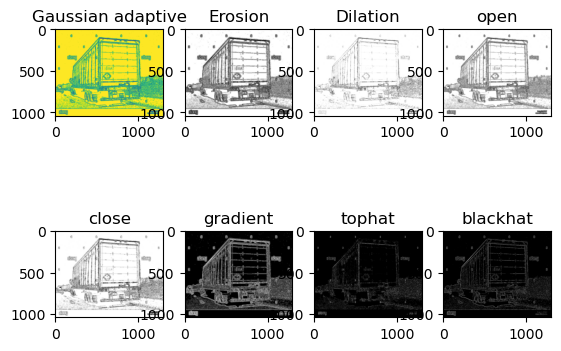

In [105]:
morphTans()

In [6]:
import cv2
import numpy as np

def detect_red_dashes(img_path):
    # Load image and convert color spaces
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # 1. Precise HSV Thresholding
    lower_red1 = np.array([0, 150, 80])  # Higher saturation/value thresholds
    upper_red1 = np.array([8, 255, 220])
    lower_red2 = np.array([170, 150, 80])
    upper_red2 = np.array([180, 255, 220])
    hsv_mask = cv2.inRange(hsv, lower_red1, upper_red1) | \
               cv2.inRange(hsv, lower_red2, upper_red2)

    # 2. LAB Color Space Analysis
    L, A, B = cv2.split(lab)
    # Target bright red (higher A channel values)
    _, a_mask = cv2.threshold(A, 140, 255, cv2.THRESH_BINARY)
    # Target low blue-yellow component
    _, b_mask = cv2.threshold(B, 120, 255, cv2.THRESH_BINARY_INV)
    lab_mask = cv2.bitwise_and(a_mask, b_mask)

    # 3. Combined Mask
    final_mask = cv2.bitwise_and(hsv_mask, lab_mask)

    # 4. Morphological Filtering
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_OPEN, kernel)  # Remove small noise
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE, (25,3)) # Connect dashes

    # 5. Contour Filtering
    dashes = []
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(cnt)
        
        # Dash characteristics (adjust based on your dashes)
        if (20 < area < 1000) and (aspect_ratio > 3):
            dashes.append(cnt)
    
    # 6. Edge Verification (optional)
    verified_dashes = []
    for cnt in dashes:
        x,y,w,h = cv2.boundingRect(cnt)
        roi = img[y:y+h, x:x+w]
        edges = cv2.Canny(roi, 50, 150)
        if np.count_nonzero(edges) > 10:  # Minimum edge content
            verified_dashes.append(cnt)
    
    return verified_dashes, final_mask

# Usage
dash_contours, mask = detect_red_dashes("/home/kronos/Desktop/thhy.jpg")
print(f"Detected {len(dash_contours)} dashes")

# Visualization
result = cv2.drawContours(cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR), dash_contours, -1, (0,255,0), 2)
cv2.imshow("Result", result)
cv2.waitKey(0)


Detected 0 dashes


113

In [11]:
# Use this interactive tool to find optimal values
def find_hsv_values(img_path):
    img = cv2.imread(img_path)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    def update(x):
        lower = np.array([cv2.getTrackbarPos('H1', 'image'), 
                         cv2.getTrackbarPos('S1', 'image'),
                         cv2.getTrackbarPos('V1', 'image')])
        upper = np.array([cv2.getTrackbarPos('H2', 'image'),
                         cv2.getTrackbarPos('S2', 'image'),
                         cv2.getTrackbarPos('V2', 'image')])
        mask = cv2.inRange(hsv, lower, upper)
        cv2.imshow('mask', mask)
    
    cv2.namedWindow('image')
    cv2.createTrackbar('H1', 'image', 0, 179, update)
    cv2.createTrackbar('S1', 'image', 120, 255, update)
    cv2.createTrackbar('V1', 'image', 70, 255, update)
    cv2.createTrackbar('H2', 'image', 10, 179, update)
    cv2.createTrackbar('S2', 'image', 255, 255, update)
    cv2.createTrackbar('V2', 'image', 220, 255, update)
    
    update(0)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
# Usage: Call this with your image path
find_hsv_values("/home/kronos/Desktop/thhy.jpg")

In [5]:
def debug_visualization(img, hsv_mask, lab_mask, final_mask, contours):
    plt.figure(figsize=(20,10))
    
    plt.subplot(231)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(232)
    plt.imshow(hsv_mask, cmap='gray')
    plt.title('HSV Mask')
    
    plt.subplot(233)
    plt.imshow(lab_mask, cmap='gray')
    plt.title('LAB Mask')
    
    plt.subplot(234)
    plt.imshow(final_mask, cmap='gray')
    plt.title('Final Mask')
    
    # Draw contours on original image
    cont_img = img.copy()
    cv2.drawContours(cont_img, contours, -1, (0,255,0), 2)
    plt.subplot(235)
    plt.imshow(cv2.cvtColor(cont_img, cv2.COLOR_BGR2RGB))
    plt.title('Contours Detected')
    
    plt.tight_layout()
    plt.show()


In [ ]:
def totalArea(img_path):
    # Load image with checks
    img = cv2.imread(imgPath)
    #img = cv.Canny(img,200,255)
    img_Region = img[]
    #kernel = np.ones((7,7),np.uint8)

    #img = cv.morphologyEx(img,cv.MORPH_OPEN,kernel)
    if img is None:
        raise ValueError("Image not loaded properly")
    img = cv.GaussianBlur(img,(5,5),2)
    # Convert color spaces
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # Updated thresholds (example values - adjust using the tool)
    # lower_red1 = np.array([0, 41, 43])
    # upper_red1 = np.array([10, 62, 65])
    # lower_red2 = np.array([11, 41, 43])
    # upper_red2 = np.array([20, 62, 65])
    wlower1 = np.array([8, 8, 160])
    wupper1 = np.array([108, 16, 200])
    lower_red1 = np.array([0, 100, 137])
    upper_red1 = np.array([3, 185, 235])
    lower_red2 = np.array([177, 100, 137])
    upper_red2 = np.array([179, 185, 235])

    # Create masks
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine the two masks
    final_mask = cv2.bitwise_or(mask1, mask2)
    
    
    # hsv_mask = cv2.inRange(hsv, lower_red1, upper_red1) | \
    #            cv2.inRange(hsv, lower_red2, upper_red2)
    hsv_mask = cv2.inRange(hsv, wlower1, wupper1)
    f_mask = cv2.bitwise_or(hsv_mask, final_mask)
    # LAB space processing
    L, A, B = cv2.split(lab)
    _, a_mask = cv2.threshold(A, 60, 255, cv2.THRESH_BINARY)
    _, b_mask = cv2.threshold(B, 120, 255, cv2.THRESH_BINARY_INV)
    lab_mask = cv2.bitwise_and(a_mask, b_mask)
    
    # Combine masks
    final_mask = cv2.bitwise_or(f_mask, lab_mask)
    
    # Adaptive morphology based on image size
    height, width = img.shape[:2]
    kernel_width = max(5, int(width/100))  # Adjust divisor based on dash density
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_width, 3))
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE, kernel)
    
    # Find contours with relaxed parameters
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Contour filtering with dynamic thresholds
    min_area = (width * height) / 10000  # Example: 0.01% of image area
    max_area = (width * height) / 1000    # Example: 0.1% of image area
    dashes = []
    min_solidity = 0.75 

    min_extent = 0.5
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = w / h if h!= 0 else 0
        area = cv2.contourArea(cnt)
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)
        solidity = area / hull_area if hull_area > 0 else 0
        rect_area = w * h
        extent = area / rect_area if rect_area > 0 else 0
        if (3000 < area < 15000) and (600 < y < 800) and (0.7<aspect_ratio):
       
            dashes.append(cnt)
    contour = dashes[0]  # Extract the numpy array from the list

    x = contour[:,0,0]
    y = contour[:,0,1]
    area_1 = 0.5 * np.abs(np.dot(x, np.roll(y,1)) - np.dot(y, np.roll(x,1)))
    # Debug visualization
    debug_visualization(img, hsv_mask, lab_mask, final_mask, dashes)
    
    return area, len(dashes),area_1


In [99]:
def detect_red_dashes_enhanced(img_path):
    # Load image with checks
    img = cv2.imread(imgPath)
    #img = cv.Canny(img,200,255)

    #kernel = np.ones((7,7),np.uint8)

    #img = cv.morphologyEx(img,cv.MORPH_OPEN,kernel)
    if img is None:
        raise ValueError("Image not loaded properly")
    img = cv.GaussianBlur(img,(5,5),2)
    # Convert color spaces
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # Updated thresholds (example values - adjust using the tool)
    # lower_red1 = np.array([0, 41, 43])
    # upper_red1 = np.array([10, 62, 65])
    # lower_red2 = np.array([11, 41, 43])
    # upper_red2 = np.array([20, 62, 65])
    wlower1 = np.array([8, 8, 160])
    wupper1 = np.array([108, 16, 200])
    lower_red1 = np.array([0, 100, 137])
    upper_red1 = np.array([3, 185, 235])
    lower_red2 = np.array([177, 100, 137])
    upper_red2 = np.array([179, 185, 235])

    # Create masks
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine the two masks
    final_mask = cv2.bitwise_or(mask1, mask2)
    
    
    # hsv_mask = cv2.inRange(hsv, lower_red1, upper_red1) | \
    #            cv2.inRange(hsv, lower_red2, upper_red2)
    hsv_mask = cv2.inRange(hsv, wlower1, wupper1)
    #f_mask = cv2.bitwise_or(hsv_mask, final_mask)
    # LAB space processing
    L, A, B = cv2.split(lab)
    _, a_mask = cv2.threshold(A, 255, 255, cv2.THRESH_BINARY)
    _, b_mask = cv2.threshold(B, 255, 255, cv2.THRESH_BINARY_INV)
    lab_mask = cv2.bitwise_and(a_mask, b_mask)
    
    # Combine masks
    final_mask = cv2.bitwise_or(hsv_mask, lab_mask)
    
    # Adaptive morphology based on image size
    height, width = img.shape[:2]
    kernel_width = max(5, int(width/100))  # Adjust divisor based on dash density
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_width, 3))
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE, kernel)
    
    # Find contours with relaxed parameters
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Contour filtering with dynamic thresholds
    min_area = (width * height) / 10000  # Example: 0.01% of image area
    max_area = (width * height) / 1000    # Example: 0.1% of image area
    dashes = []
    min_solidity = 0.75 

    min_extent = 0.5
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = w / h if h!= 0 else 0
        area = cv2.contourArea(cnt)
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)
        solidity = area / hull_area if hull_area > 0 else 0
        rect_area = w * h
        extent = area / rect_area if rect_area > 0 else 0
        if (100 < area < 15000) and (600 < y < 700) and (0.5<aspect_ratio):
       
            dashes.append(cnt)
    contour = dashes[0]  # Extract the numpy array from the list

    x = contour[:,0,0]
    y = contour[:,0,1]
    area_1 = 0.5 * np.abs(np.dot(x, np.roll(y,1)) - np.dot(y, np.roll(x,1)))
    
    # Debug visualization
    debug_visualization(img, hsv_mask, lab_mask, final_mask, dashes)
    
    return area,len(dashes),area_1


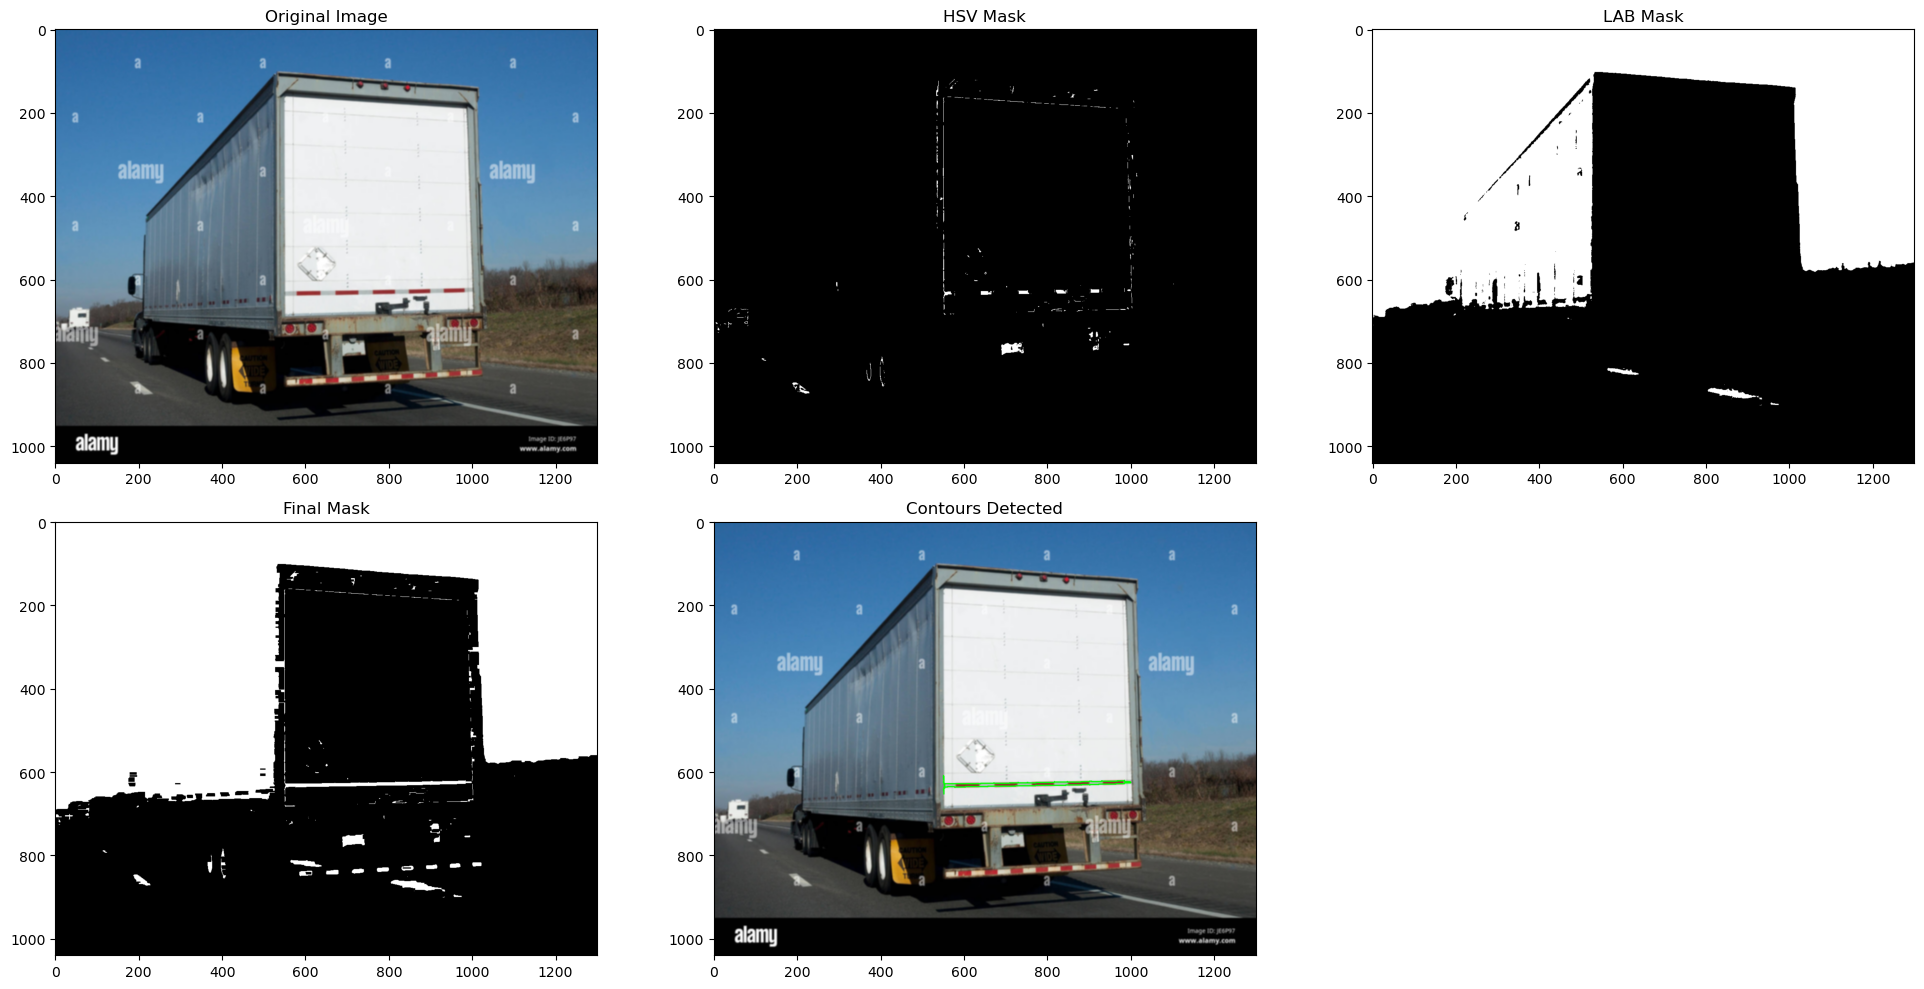

(570439.0, 1, 3184.5)

In [102]:
totalArea(imgPath)

In [ ]:
import numpy as np

# If r is a list of one contour array:
contour = r[0]  # Extract the numpy array from the list

x = contour[:,0,0]
y = contour[:,0,1]
area = 0.5 * np.abs(np.dot(x, np.roll(y,1)) - np.dot(y, np.roll(x,1)))
print(area)

In [95]:
def detect_red_dashes_enhanced(img_path):
    # Load image with checks
    img = cv2.imread(imgPath)
    #img = cv.Canny(img,200,255)

    #kernel = np.ones((7,7),np.uint8)

    #img = cv.morphologyEx(img,cv.MORPH_OPEN,kernel)
    if img is None:
        raise ValueError("Image not loaded properly")
    img = cv.GaussianBlur(img,(5,5),2)
    # Convert color spaces
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # Updated thresholds (example values - adjust using the tool)
    # lower_red1 = np.array([0, 41, 43])
    # upper_red1 = np.array([10, 62, 65])
    # lower_red2 = np.array([11, 41, 43])
    # upper_red2 = np.array([20, 62, 65])
    wlower1 = np.array([8, 8, 160])
    wupper1 = np.array([108, 16, 200])
    lower_red1 = np.array([0, 100, 137])
    upper_red1 = np.array([3, 185, 235])
    lower_red2 = np.array([177, 100, 137])
    upper_red2 = np.array([179, 185, 235])

    # Create masks
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    # Combine the two masks
    final_mask = cv2.bitwise_or(mask1, mask2)
    
    
    # hsv_mask = cv2.inRange(hsv, lower_red1, upper_red1) | \
    #            cv2.inRange(hsv, lower_red2, upper_red2)
    hsv_mask = cv2.inRange(hsv, wlower1, wupper1)
    f_mask = cv2.bitwise_or(final_mask, final_mask)
    # LAB space processing
    L, A, B = cv2.split(lab)
    _, a_mask = cv2.threshold(A, 60, 255, cv2.THRESH_BINARY)
    _, b_mask = cv2.threshold(B, 120, 255, cv2.THRESH_BINARY_INV)
    lab_mask = cv2.bitwise_and(a_mask, b_mask)
    
    # Combine masks
    final_mask = cv2.bitwise_or(final_mask, lab_mask)
    
    # Adaptive morphology based on image size
    height, width = img.shape[:2]
    kernel_width = max(5, int(width/100))  # Adjust divisor based on dash density
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_width, 3))
    final_mask = cv2.morphologyEx(final_mask, cv2.MORPH_CLOSE, kernel)
    
    # Find contours with relaxed parameters
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Contour filtering with dynamic thresholds
    min_area = (width * height) / 10000  # Example: 0.01% of image area
    max_area = (width * height) / 1000    # Example: 0.1% of image area
    dashes = []
    min_solidity = 0.75 

    min_extent = 0.5
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = w / h if h!= 0 else 0
        area = cv2.contourArea(cnt)
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)
        solidity = area / hull_area if hull_area > 0 else 0
        rect_area = w * h
        extent = area / rect_area if rect_area > 0 else 0
        if (100 < area < 15000) and (600 < y < 700) and (0.3<aspect_ratio):
       
            dashes.append(cnt)
    
    # Debug visualization
    debug_visualization(img, hsv_mask, lab_mask, final_mask, dashes)
    
    return hull,len(dashes)


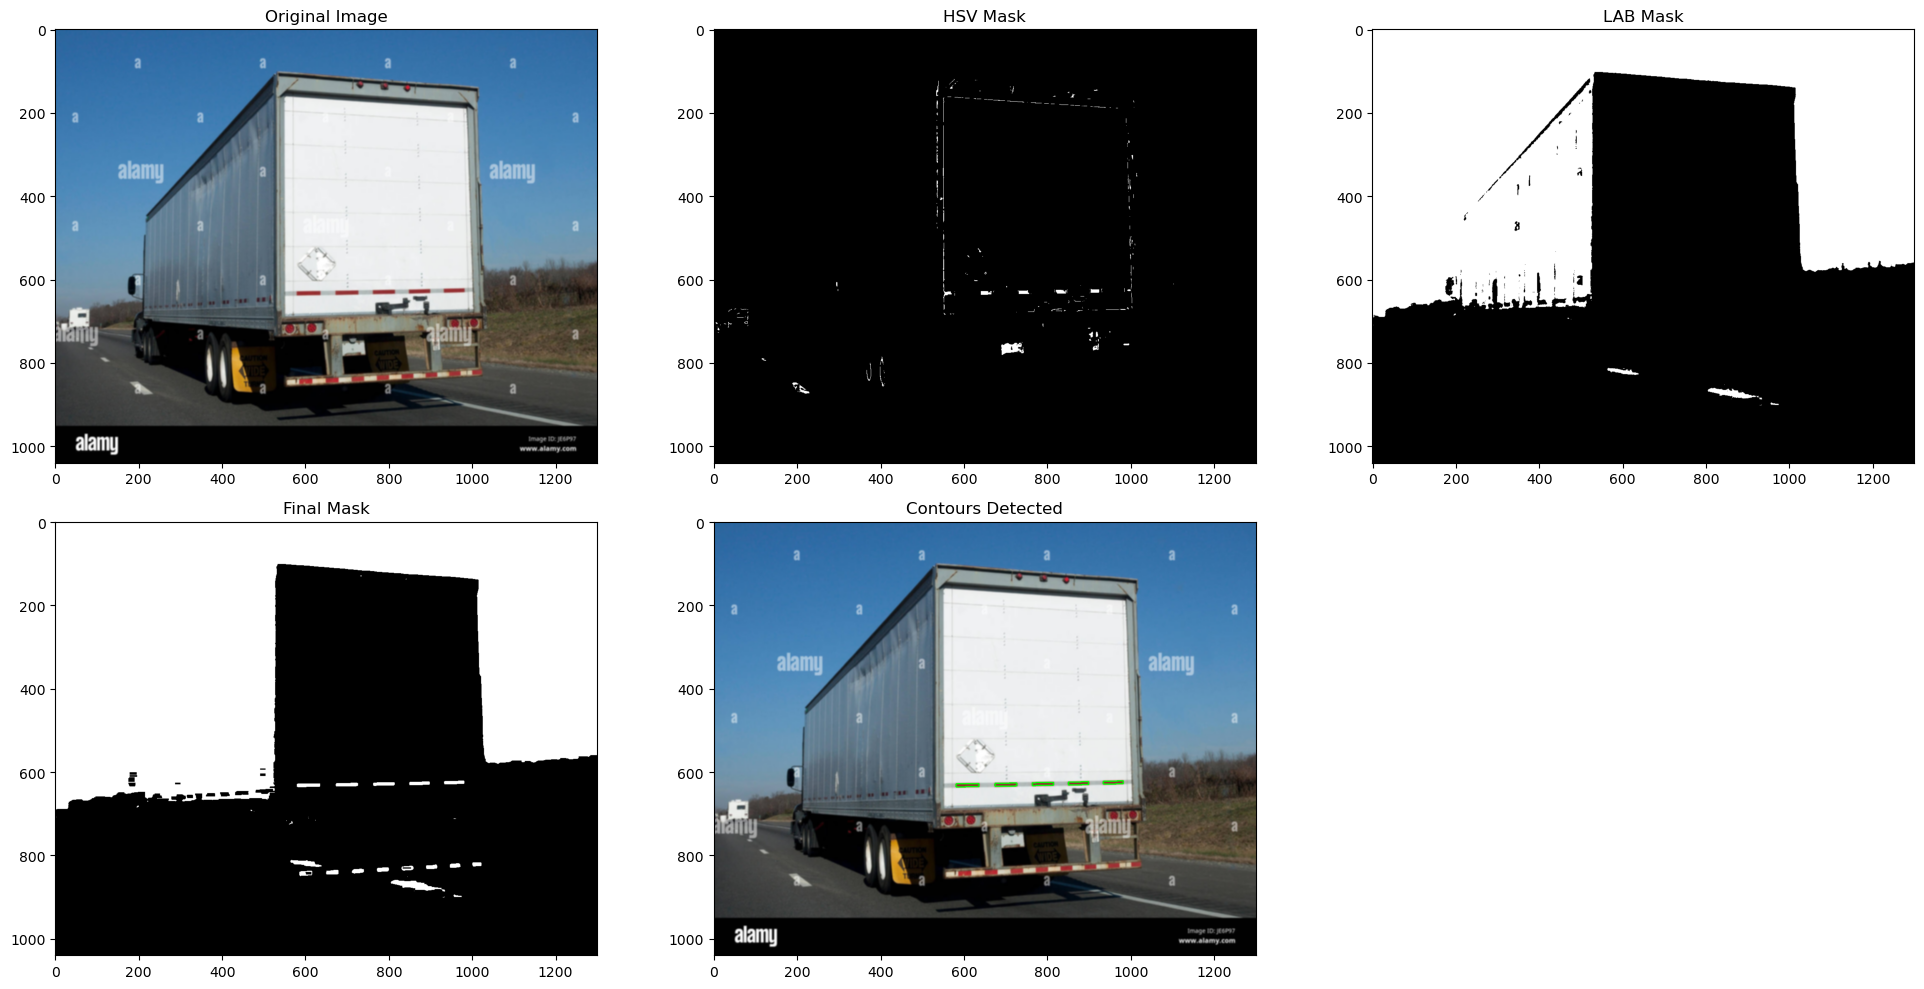

In [96]:
r = detect_red_dashes_enhanced(imgPath)

In [97]:
r

(array([[[1299,    0]],
 
        [[1299,  560]],
 
        [[1280,  564]],
 
        [[1253,  569]],
 
        [[ 509,  667]],
 
        [[  29,  689]],
 
        [[   4,  690]],
 
        [[   0,  690]],
 
        [[   0,    0]]], dtype=int32),
 5)

In [73]:
contour = r[0]  # Extract the numpy array from the list
    

In [75]:
contour[0]

array([[[582, 629]],

       [[581, 630]],

       [[580, 630]],

       [[580, 636]],

       [[581, 636]],

       [[582, 637]],

       [[602, 637]],

       [[603, 636]],

       [[634, 636]],

       [[635, 635]],

       [[635, 629]]], dtype=int32)

In [98]:
import numpy as np

# If r is a list of one contour array:
contour = r[0]  # Extract the numpy array from the list

x = contour[:,0,0]
y = contour[:,0,1]
area = 0.5 * np.abs(np.dot(x, np.roll(y,1)) - np.dot(y, np.roll(x,1)))
print(area)


831203.0


In [63]:
len(r[0])

5

In [174]:
def cannyEdge():

     root = os.getcwd()
     imgPath = os.path.join(root,'rhm.jpg')
     img = cv.imread(imgPath,cv.IMREAD_GRAYSCALE)
     #imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
     scale = 1/5
     heightScale =  int(img.shape[0]*scale)
     widthScale = int(img.shape[1]*scale)
     imgRGB = cv.resize(img,(widthScale,heightScale))
     plt.figure()
     plt.subplot(231)
     plt.imshow(imgRGB)
     imgCanny = cv.Canny(imgRGB,200,255)
     #detect_red_dashes_enhanced(imgCanny)
     plt.subplot(232)
     plt.imshow(imgCanny,cmap = 'gray')
     plt.show()
     return imgCanny


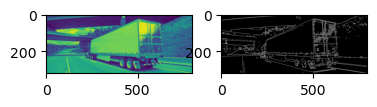

In [175]:
r = cannyEdge()


In [176]:
kernel = np.ones((7,7),np.uint8)

img = cv.morphologyEx(r,cv.MORPH_CLOSE,kernel)

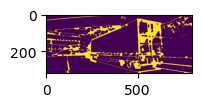

In [177]:
plt.figure()
plt.subplot(231)
plt.imshow(img)

In [178]:
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Step 3: Find contours
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 4: Draw contours
cv2.drawContours(img, contours, -1, (0,255,0), 2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [180]:
cv2.imshow('Contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [68]:
import cv2
import numpy as np

def count_dashes(image_path):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        return "Image not found"
    
    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Define red color ranges
    # lower_red1 = np.array([0, 41, 43])
    # upper_red1 = np.array([10, 62, 55])
    # lower_red2 = np.array([170, 41, 43])
    # upper_red2 = np.array([179, 62, 55])
    lower1 = np.array([8, 8, 160])
    upper1 = np.array([108, 16, 200])

    
    # Create red mask
    # mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    # mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    # red_mask = cv2.bitwise_or(mask2, mask2)
    mask = cv2.inRange(hsv, lower1, upper1)

    # Connect dashes with horizontal morphology
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 3))
    closed_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Find contours
    contours, _ = cv2.findContours(closed_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter and count dashes
    dash_count = 0
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / h
        if w > 20 and aspect_ratio > 2:  # Minimum dash dimensions
            dash_count += 1
    
    return dash_count

# Usage
print("Number of dashes:", count_dashes(imgPath))


Number of dashes: 24


In [69]:
import os

img_path = "/home/kronos/Desktop/rhm.jpg"
print(f"Image exists: {os.path.exists(img_path)}")  # Should print "True"


Image exists: True


In [3]:
cv.__version__

'4.11.0'

In [4]:
root = os.getcwd()
root

'/home/kronos/Desktop'

40,60,40,50

62,41, 55 43

In [3]:
def readImage():
    root = os.getcwd()
    imgPath = os.path.join(root,'thhy.jpg')
    img = cv.imread(imgPath)
    scale = 1/2
    heightScale =  int(img.shape[0]*scale)
    widthScale = int(img.shape[1]*scale)
    imgRGB = cv.resize(img,(widthScale,heightScale))
    # Create a named window and make it resizable
    #cv.namedWindow(window_name, cv.WINDOW_NORMAL)
    
    cv.imshow('image',imgRGB)
    cv.waitKey(0)

In [4]:
readImage()

In [6]:
outPath = os.path.join(root,'Desktop/raman.jpg')

In [7]:
readImage()

In [114]:
def writeImage():
    root = os.getcwd()
    imgPath = os.path.join(root,'Pictures/Screenshots/Screenshot from 2025-03-13 13-27-51.png')
    img = cv.imread(imgPath)
    outPath = os.path.join(root,'Desktop/raman.jpg')
    cv.imwrite(outPath,img)


In [9]:
writeImage()

[ WARN:0@38.195] global loadsave.cpp:268 findDecoder imread_('/home/kronos/Desktop/Pictures/Screenshots/Screenshot from 2025-03-13 13-27-51.png'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:929: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


In [10]:
def VideoFromWebcam():
    cap = cv.VideoCapture(0)
    #isOpened checks if the cap can be opened, not whether it is open or not.
    if not cap.isOpened():
        exit()
    while True:
        ret, frame = cap.read()
        if ret:
            cv.imshow('Webcam',frame)
        if cv.waitKey(1) == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

In [11]:
VideoFromWebcam()

In [20]:
def VideoFromFile():
    root = os.getcwd()
    vidPath  = os.path.join(root,'Videos/Screencasts/tyeh.webm')
    cap = cv.VideoCapture(vidPath)
    while cap.isOpened():
        ret,frame = cap.read()
        cv.imshow('video',frame)
        delay = int(1000/60)
        if cv.waitKey(delay) == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

In [22]:
VideoFromFile()

In [31]:
def writeVideoToFile():
    cap = cv.VideoCapture(0)
    #isOpened checks if the cap can be opened, not whether it is open or not.
    #cap = cv.VideoCapture()
    #cap = cv.VideoCapture("/home/kronos/Desktop/sample-5s.mp4")
    fourcc = cv.VideoWriter_fourcc(*'XVID') #MPEG4 encoding
    root = os.getcwd()
    outPath = os.path.join(root,'Desktop/raman_1.avi')
    out = cv.VideoWriter(outPath,fourcc,120.0,(640,480))
    if not cap.isOpened():
        exit()
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            out.write(frame)
            cv.imshow('Webcam',frame)
        if cv.waitKey(1) == ord('q'):
            break
    cap.release()
    out.release()
    cv.destroyAllWindows()

In [32]:
writeVideoToFile()

Reading and writing pixels:

In [2]:
def readAndWriteSinglePixel():
     root = os.getcwd()
     imgPath = os.path.join(root,'raman.jpg')
     img = cv.imread(imgPath)
     #matplotlib takes RGB, the imread by default takes BGR
     imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
     cv.imshow('Raman',imgRGB)
     cv.waitKey(0)
     cv.destroyAllWindows()
     eyePixel = imgRGB[50,300]
     imgRGB[50, 300] = [255,0,0]
     debug = 1

In [3]:
readAndWriteSinglePixel()

In [16]:
def readAndWriteRegion():
     root = os.getcwd()
     imgPath = os.path.join(root,'raman.jpg')
     img = cv.imread(imgPath)
     #matplotlib takes RGB, the imread by default takes BGR
     imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
     plt.figure()
     plt.imshow(imgRGB)
     plt.show()
     eyeRegion = imgRGB[100:200,30:100]
     dx = 200 - 100
     dy = 100 - 30
     startX = 200 
     startY = 100
     imgRGB[startX:startX+dx, startY:startY+dy] = eyeRegion
     debug = 1

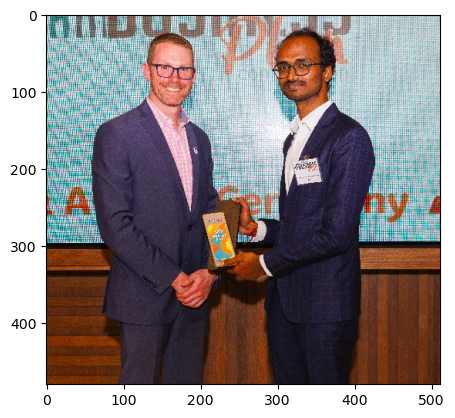

In [17]:
readAndWriteRegion()

In [73]:
import cv2

def show_hsv_value(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        pixel = hsv[y, x]
        print(f"HSV at ({x},{y}): {pixel}")

img = cv2.imread(imgPath)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('Image', img)
cv2.setMouseCallback('Image', show_hsv_value)
cv2.waitKey(0)
cv2.destroyAllWindows()


HSV at (589,634): [  0 180 147]
HSV at (605,635): [179 178 156]
HSV at (626,637): [178 110 164]
HSV at (628,636): [179 164 149]
HSV at (680,632): [  0 168 143]
HSV at (697,634): [179 175 147]
HSV at (720,632): [  0 175 143]
HSV at (727,632): [  0 113 158]
HSV at (768,628): [179 168 156]
HSV at (784,634): [177 128 146]
HSV at (799,634): [178 100 151]
HSV at (811,632): [178 174 161]
HSV at (858,630): [179 179 137]
HSV at (872,631): [178 163 149]
HSV at (887,630): [178 178 142]
HSV at (897,629): [178 169 149]
HSV at (939,626): [179 178 156]
HSV at (951,627): [  0 182 147]
HSV at (962,628): [179 185 150]
HSV at (974,629): [179 156 155]
HSV at (977,629): [  0 160 143]
HSV at (991,470): [  0   0 235]


In [66]:
import cv2
import numpy as np

img = cv2.imread(imgPath)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Let user select a region of interest (ROI)
roi = cv2.selectROI("Select Region", img, showCrosshair=True)
x, y, w, h = roi

# Crop the selected region from the HSV image
region = hsv[y:y+h, x:x+w]

# Calculate statistics
mean_hsv = np.mean(region.reshape(-1, 3), axis=0)
min_hsv = np.min(region.reshape(-1, 3), axis=0)
max_hsv = np.max(region.reshape(-1, 3), axis=0)

print(f"Selected region: x={x}, y={y}, w={w}, h={h}")
print(f"Mean HSV: {mean_hsv}")
print(f"Min HSV: {min_hsv}")
print(f"Max HSV: {max_hsv}")

cv2.destroyAllWindows()


Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Selected region: x=553, y=627, w=27, h=11
Mean HSV: [ 78.24915825  10.57912458 190.54882155]
Min HSV: [  0   0 148]
Max HSV: [179  82 243]
